In [54]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

X shape: (1024, 2414)
C shape: (100, 100)
C diagnal: [ 63.49298131   5.46453924  74.86824965 105.82305441 113.99585274
 126.47059028]


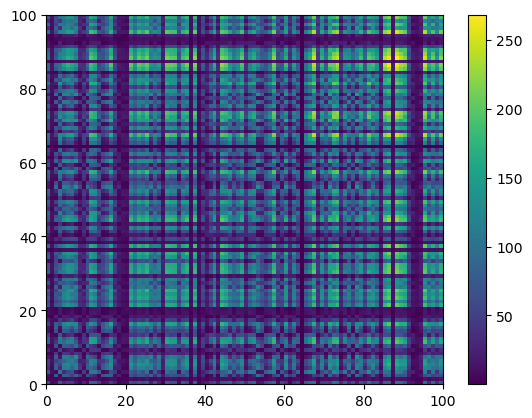

In [55]:
# Part A:
# Load the data
results = loadmat('yalefaces.mat')
X = results['X']
print("X shape:", X.shape)

# Compute the correlation matrix between the first 100 images in X
C = np.dot(X[:, :100].T, X[:, :100])
print("C shape:", C.shape)
print('C diagnal:', np.diag(C)[:6])

# Plot the correlation matrix using pcolor
plt.pcolor(C)
plt.colorbar()
plt.show()

In [56]:
#Part B
# Find the two most highly correlated and most uncorrelated images
max_corr = np.max(C - np.eye(100)*C)
min_corr = np.min(C + 1e16 * np.eye(100))
most_corr = np.where(C == max_corr)
least_corr = np.where(C == min_corr)

print('Most highly correlated images are: {}'.format(most_corr[0]))
print('Most least correlated images are: {}'.format(least_corr[0]))

Most highly correlated images are: [86 88]
Most least correlated images are: [54 64]


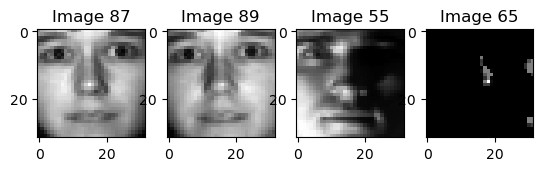

In [57]:
# Plot the two most highly correlated and most uncorrelated images
fig, axs = plt.subplots(1, 4)
axs[0].imshow(X[:, most_corr[0][0]].reshape(32, 32), cmap='gray')
axs[0].set_title('Image ' + str(most_corr[0][0] + 1))
axs[1].imshow(X[:, most_corr[1][0]].reshape(32, 32), cmap='gray')
axs[1].set_title('Image ' + str(most_corr[1][0] + 1))
axs[2].imshow(X[:, least_corr[0][0]].reshape(32, 32), cmap='gray')
axs[2].set_title('Image ' + str(least_corr[0][0] + 1))
axs[3].imshow(X[:, least_corr[1][0]].reshape(32, 32), cmap='gray')
axs[3].set_title('Image ' + str(least_corr[1][0] + 1))
plt.show()

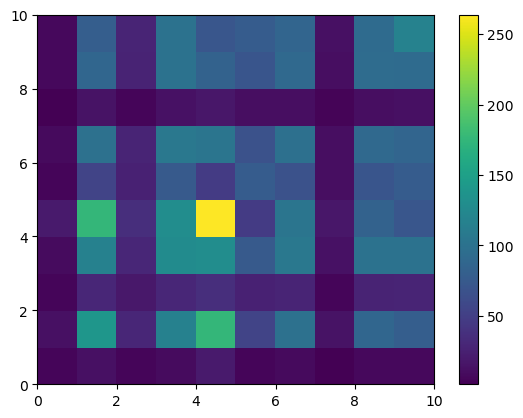

In [58]:
# Part C
# These are the indices of the faces we want to find correlations
face_idx = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
faces_we_care = X[:, face_idx]

face_corr = np.dot(faces_we_care.T, faces_we_care)

plt.pcolor(face_corr)
plt.colorbar()
plt.show()

In [59]:
# Part D
Y = np.dot(X, X.T)

eigval, eigvec = np.linalg.eig(Y)

# Find the first six eigenvectors with the largest magnitude eigenvalue
eigvals, eigvecs = np.linalg.eig(Y)
idx = np.argsort(np.abs(eigvals))[::-1][:6]
top_eigvecs = eigvecs[:, idx]
top_eigvals = eigvals[idx]

# Print the results
for i, v in enumerate(top_eigvecs.T):
    print("Eigenvector {} : {}; Eigenvalue is {}".format(i+1, v, top_eigvals[i]))

Eigenvector 1 : [0.02384327 0.02576146 0.02728448 ... 0.02082937 0.0193902  0.0166019 ]; Eigenvalue is 234020.4548538864
Eigenvector 2 : [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
 -0.02965746]; Eigenvalue is 49038.315300592236
Eigenvector 3 : [0.05653196 0.04709124 0.0362807  ... 0.06455006 0.06196898 0.05241684]; Eigenvalue is 8236.539897013146
Eigenvector 4 : [ 0.04441826  0.05057969  0.05522219 ... -0.01006919 -0.00355905
  0.00040934]; Eigenvalue is 6024.871457930164
Eigenvector 5 : [-0.03378603 -0.01791442 -0.00462854 ...  0.06172201  0.05796353
  0.05757412]; Eigenvalue is 2051.496432691045
Eigenvector 6 : [0.02207542 0.03378819 0.04487476 ... 0.03025485 0.02850199 0.00941028]; Eigenvalue is 1901.0791148236608


Principal component direction 1 is: [-0.02384327 -0.04535378 -0.05653196 ... -0.00238077 -0.0015886
  0.00041024]
Eigenvalue 1 is: 234020.45485388592
Principal component direction 2 is: [-0.02576146 -0.04567536 -0.04709124 ...  0.00265168  0.00886966
 -0.0047811 ]
Eigenvalue 2 is: 49038.31530059221
Principal component direction 3 is: [-0.02728448 -0.04474528 -0.0362807  ... -0.00073077 -0.00706009
  0.00678472]
Eigenvalue 3 is: 8236.53989701318
Principal component direction 4 is: [-0.0289902  -0.04316163 -0.02344727 ... -0.00367797  0.00323748
  0.00077172]
Eigenvalue 4 is: 6024.871457930142
Principal component direction 5 is: [-0.03057294 -0.04080838 -0.00992662 ...  0.00988825 -0.00657576
  0.00607428]
Eigenvalue 5 is: 2051.4964326910454
Principal component direction 6 is: [-0.03229324 -0.03805116  0.00241627 ... -0.01055232  0.00471235
 -0.00872253]
Eigenvalue 6 is: 1901.0791148236576


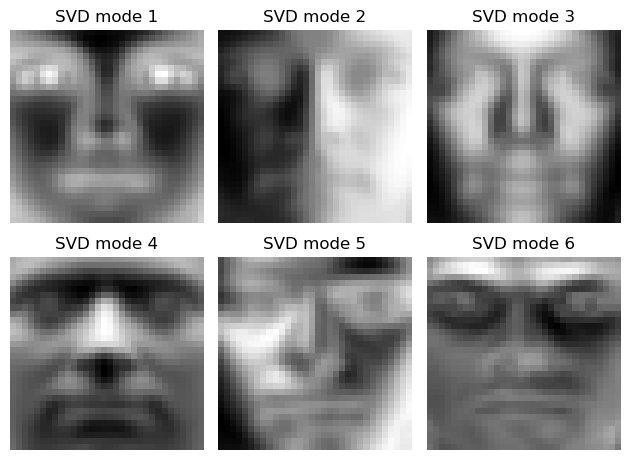

In [60]:
# Part E
U, S, Vt = np.linalg.svd(X)

for i in range(6):
    print('Principal component direction {} is: {}'.format(i+1, U[i]))
    print("Eigenvalue {} is: {}".format(i+1, S[i] **2))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(U[:,i].reshape(32,32), cmap= 'gray')
    plt.title(f'SVD mode {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [61]:
# Part F:
norm = np.linalg.norm(np.abs(eigvec[:,0]) - np.abs(U[:,0]))
print("the norm of v1 and u1 is: {}".format(norm))

the norm of v1 and u1 is: 1.7409659223071522e-15


In [62]:
# Part G:
total_var = np.sum(np.square(S))
pct_var_explained = (np.square(S) / total_var) * 100
pct_var_explained = np.round(pct_var_explained, 2)
for i in range(6):
    print('Percentage of variance explained by principal component {} is: {}%'.format(i+1, pct_var_explained[i]))

Percentage of variance explained by principal component 1 is: 72.93%
Percentage of variance explained by principal component 2 is: 15.28%
Percentage of variance explained by principal component 3 is: 2.57%
Percentage of variance explained by principal component 4 is: 1.88%
Percentage of variance explained by principal component 5 is: 0.64%
Percentage of variance explained by principal component 6 is: 0.59%
